# Setting up environment, implementation of Apriori algorithm for finding frequent pairs of elements (Lab 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import time
import math
import random

# Loading Retail Data

In [15]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')

In [16]:
data.shape

(88161, 1)

In [17]:
data.head()

,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
0,30 31 32
1,33 34 35
2,36 37 38 39 40 41 42 43 44 45 46
3,38 39 47 48
4,38 39 48 49 50 51 52 53 54 55 56 57 58


# Create Pairs from baskets using Apriori

In [18]:
def builtinApriori(data,minSup):
    rec = []
    for i in range(0,len(data)):
        rec.append([str(data.values[i,j]) for j in range(1)])
    
    words=[0 for i in range(len(rec))]
    for x in range(len(rec)):
        for sentence in rec[x]: 
            words[x] = sentence.split()  
    
    association_rules = apriori(words, min_support=minSup, min_lift=3, min_length=2)
    association_results = list(association_rules)
    
    results = []
    for item in association_results:
        pair = item[0] 
        items = [x for x in pair]

        value0 = str(items[0])
        value1 = str(items[1])

        value2 = str(item[1])[:7]


        rows = (value0, value1,value2)
        results.append(rows)

    labels = ['Item 1','Item 2','Support']
    df = pd.DataFrame.from_records(results, columns = labels)

    return df

In [23]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
start_time=time.time()
print(builtinApriori(data,0.0053))
end_time=time.time()
print("Time Taken for 100% data 0.0053% Threshold",end_time-start_time)

   Item 1 Item 2  Support
0      38    105  0.00729
1     110     38  0.03090
2   16010  16011  0.00738
3     170     38  0.03438
4     271    270  0.00771
5      38    286  0.01265
6      38     36  0.03164
7      38     37  0.01186
8      38    371  0.00869
9      55     38  0.00745
10     56     38  0.00583
11    790     38  0.00576
12    110     39  0.01973
13    110     38  0.00755
14     48    110  0.01543
15    170     38  0.00603
16    170     39  0.02290
17    170     38  0.00900
18    170     48  0.01744
19     39    271  0.00548
20     39     38  0.00825
21     48     38  0.00659
22     32     38  0.00535
23     39     38  0.02206
24     41     38  0.00761
25     48     38  0.01542
26     38     39  0.00775
27     48     38  0.00631
28     38     39  0.00596
29    110     39  0.00579
30     48    110  0.01169
31    170     39  0.00697
32    170     48  0.01353
33    170     48  0.00548
34     41     39  0.00627
35     48     39  0.01225
Time Taken for 100% data 0.0053% Thres

# Split rows on space into 2D Array

In [2]:
def split_2D_Array(data):    
    rec = []
    for i in range(0,len(data)):
        rec.append([str(data.values[i,j]) for j in range(1)])
        
    words=[0 for i in range(len(rec))]
    for x in range(len(rec)):
        for sentence in rec[x]: 
            words[x] = sentence.split()  
    numbers = [[int(float(j)) for j in i] for i in words]#changing string to int values
    return numbers

# Implementation of Apriori Algorithm

# Candidate Pairs (C1)

In [3]:
def C1(numbers,df):
    C1=[]
    for basket in df["Buckets"]:
        for value in basket:
            if not value in C1:
                C1.append(value)
    countUniNumbers = []            
    for value in (C1):
        countUniNumbers.append((value, numbers.count(value)))
    C1DF = pd.DataFrame(countUniNumbers,columns=["itemset", "Support"])
    return C1DF

# Frequent Itemset Pruning (L1-L2)

In [4]:
def pruneNonFreqL1(data,countUniNumbers,threshold):
    minSup=threshold
    filterC1=countUniNumbers['Support'] >= minSup
    pruneFreqL1=countUniNumbers[filterC1]
    return pruneFreqL1
    

# Generate C2

Self Join

In [5]:
def C2(freqL1,data):
    # Set to store unique pairs
    s = []
    uniitem = set(freqL1['itemset'])
    listOfUniNumbers = list(uniitem)#converts to list
    
    n=len(listOfUniNumbers)    
    
    # Make all possible pairs
    for i in range(n):
        for j in range((i+1),n):            
            candidate = set({listOfUniNumbers[i],listOfUniNumbers[j]})
            if candidate not in s:
                 s.append(candidate)
    C2=[]
    for i in range(len(s)):
        C2.append((s[i], 0))
        
    C2DF = pd.DataFrame(C2, columns=["itemset", "Support"])
    print("Unique Pairs = ",C2DF.shape)
    for i in range(data.shape[0]):
        for j in range(C2DF.shape[0]):
            if (C2DF['itemset'][j]).issubset(set(data['Buckets'][i])): 
                C2DF.loc[j, 'Support']+= 1
        
    return C2DF

# Testing Apriori Implementaion

In [6]:
def Apriori(data,Min_Threshold):
    
    #spliting datafram into 2D Array, Easier to implement
    numbers=split_2D_Array(data)
    
    
    dict_data = {'Buckets': numbers}
    df = pd.DataFrame.from_dict(dict_data)
    
    #Creating new dataframe
    items = []
    for i in range(len(df)):
        for j in range(len(df['Buckets'][i])):
            items.append(df['Buckets'][i][j])#all the values into an array
       
    Min_Threshold=data.shape[0]*Min_Threshold
    print("Minimum support = ",Min_Threshold)     
    
    #Implementing C1 for finding frequent Items
    C1DF=C1(items,df)
    
    #Implementing Pruning for C1 (L1)
    freqL1 = pruneNonFreqL1(data,C1DF,Min_Threshold)
    
    #Implementing C2 for finding Frequent Itemsets
    C2DF=C2(freqL1,df) 
    
    
    #Implementing Pruning for C2 (L2)
    freqL2 = pruneNonFreqL1(data,C2DF,Min_Threshold)    
    
    return freqL2
    

In [287]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')

In [288]:
data.head()

,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
0,30 31 32
1,33 34 35
2,36 37 38 39 40 41 42 43 44 45 46
3,38 39 47 48
4,38 39 48 49 50 51 52 53 54 55 56 57 58


In [289]:
data.shape

(88161, 1)

In [290]:
T1T = [] 

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.2,random_state=10)
start_time=time.time()
print(Apriori(data,0.01))
end_time=time.time()
T1T.append(end_time-start_time)

Minimum support =  176.32
Unique Pairs =  (2278, 2)
          itemset  Support
215       {9, 39}      177
401     {270, 39}      256
409     {48, 270}      187
461     {39, 271}      280
469     {48, 271}      203
746     {147, 39}      212
754     {48, 147}      185
800     {533, 39}      187
808     {48, 533}      182
853     {413, 39}      222
861     {48, 413}      219
904     {38, 286}      214
955      {32, 38}      565
956      {32, 39}     1658
958      {32, 41}      637
964      {32, 48}     1554
1102     {36, 38}      548
1103     {36, 39}      410
1111     {48, 36}      278
1150     {38, 39}     1992
1151     {37, 38}      219
1152     {41, 38}      771
1153    {170, 38}      582
1158     {48, 38}     1558
1187    {110, 38}      519
1198     {41, 39}     2256
1199    {170, 39}      394
1204     {48, 39}     5768
1205   {1327, 39}      261
1208    {310, 39}      372
1209    {438, 39}      243
1212     {60, 39}      200
1213   {2238, 39}      266
1214     {65, 39}      542
121

In [291]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)
start_time=time.time()
Apriori(data,0.01)
end_time=time.time()
T1T.append(end_time-start_time)


Minimum support =  352.64
Unique Pairs =  (2346, 2)


In [292]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)
start_time=time.time()
Apriori(data,0.01)
end_time=time.time()
T1T.append(end_time-start_time)

Minimum support =  528.97
Unique Pairs =  (2415, 2)


In [293]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)
start_time=time.time()
Apriori(data,0.01)
end_time=time.time()
T1T.append(end_time-start_time)


Minimum support =  705.29
Unique Pairs =  (2278, 2)


In [294]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
start_time=time.time()
Apriori(data,0.01)
end_time=time.time()
T1T.append(end_time-start_time)
T1T

Minimum support =  881.61
Unique Pairs =  (2415, 2)


[206.8355348110199,
 436.2755742073059,
 674.1361153125763,
 858.5256469249725,
 1125.6156921386719]

In [295]:
T2T = [] 

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.2,random_state=10)
start_time=time.time()
Apriori(data,0.02)
end_time=time.time()
T2T.append(end_time-start_time)

Minimum support =  352.64
Unique Pairs =  (210, 2)


In [296]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)
start_time=time.time()
Apriori(data,0.02)
end_time=time.time()
T2T.append(end_time-start_time)

Minimum support =  705.28
Unique Pairs =  (171, 2)


In [297]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)
start_time=time.time()
Apriori(data,0.02)
end_time=time.time()
T2T.append(end_time-start_time)

Minimum support =  1057.94
Unique Pairs =  (171, 2)


In [298]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)
start_time=time.time()
Apriori(data,0.02)
end_time=time.time()
T2T.append(end_time-start_time)


Minimum support =  1410.58
Unique Pairs =  (153, 2)


In [299]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
start_time=time.time()
Apriori(data,0.02)
end_time=time.time()
T2T.append(end_time-start_time)
T2T

Minimum support =  1763.22
Unique Pairs =  (190, 2)


[37.32550597190857,
 70.25151181221008,
 113.96851944923401,
 148.3745255470276,
 210.3475363254547]

In [300]:
T5T = [] 

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.2,random_state=10)
start_time=time.time()
Apriori(data,0.05)
end_time=time.time()
T5T.append(end_time-start_time)

Minimum support =  881.6
Unique Pairs =  (10, 2)


In [301]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)
start_time=time.time()
Apriori(data,0.05)
end_time=time.time()
T5T.append(end_time-start_time)

Minimum support =  1763.2
Unique Pairs =  (10, 2)


In [302]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)
start_time=time.time()
Apriori(data,0.05)
end_time=time.time()
T5T.append(end_time-start_time)

Minimum support =  2644.8500000000004
Unique Pairs =  (15, 2)


In [303]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)
start_time=time.time()
Apriori(data,0.05)
end_time=time.time()
T5T.append(end_time-start_time)

Minimum support =  3526.4500000000003
Unique Pairs =  (15, 2)


In [304]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
start_time=time.time()
Apriori(data,0.05)
end_time=time.time()
T5T.append(end_time-start_time)
T5T

Minimum support =  4408.05
Unique Pairs =  (15, 2)


[17.546502828598022,
 41.169007301330566,
 67.96401166915894,
 93.32701563835144,
 113.1610198020935]

Text(0, 0.5, 'Time Spent')

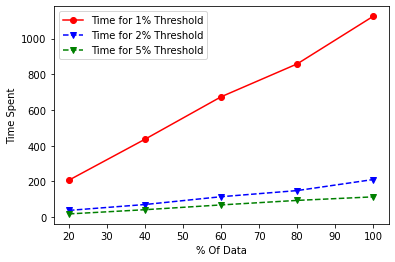

In [305]:
index=[20,40,60,80,100]
plt.plot(index,T1T,'ro-',index,T2T,'bv--',index,T5T,'gv--')
plt.legend(['Time for 1% Threshold','Time for 2% Threshold',"Time for 5% Threshold"])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

# Implementation of PCY Algorithm

# PCY Storing Counts and Items

In [7]:
def pcyC1(numbers,df):#similar to Apriori just storing frequent counts and items 
    pcyC1=[]
    for basket in df["Buckets"]:
        for value in basket:
            if not value in pcyC1:
                pcyC1.append(value)
                
    countUniNumbers = []            
    for value in (pcyC1):
        countUniNumbers.append((value, numbers.count(value)))
    pcyC1DF = pd.DataFrame(countUniNumbers,columns=["itemset", "Support"])
    
    return pcyC1DF

# Pruning Items (L1-L2)

In [8]:
def pcyNonFreqL1(countUniNumbers,min_sup):#also similar to Apriori
    filterC1=countUniNumbers['Support']>=min_sup
    pruneFreqL1=countUniNumbers[filterC1]
    return pruneFreqL1

# Pruning Itemset (L3)

In [9]:
def pcyNonFreqL2(countUniNumbers):#Remove all bit vector 0
    filterC1=countUniNumbers['Bit Vector']>=1
    pruneFreqL2=countUniNumbers[filterC1]
    return pruneFreqL2

# Bucket Hash Equation

In [10]:
#Hash function to find bucket number
def hasEq(a,b):
    return ((a*b)%10)

# Candidate Pairs C2

In [11]:
def pcyC2(freqL1,data,min_sup):
    # Set to store unique pairs
    s = []
    uniitem = set(freqL1['itemset'])
    listOfUniNumbers = list(uniitem)#converts to list
    
    n=len(listOfUniNumbers)    
    
    # Make all possible pairs
    for i in range(n):
        for j in range((i+1),n):            
            pair = set({listOfUniNumbers[i],listOfUniNumbers[j]})
            if pair not in s:
                bucket=hasEq(listOfUniNumbers[i],listOfUniNumbers[j])
                s.append((bucket,0,pair))
        
    C2DF = pd.DataFrame(s, columns=["Bucket","Support","Itemset"])
    C2DFORDER = C2DF.sort_values(by='Bucket', ascending=True)
    
    
    for i in range(data.shape[0]):
        for j in range(C2DFORDER.shape[0]):
            if (C2DFORDER['Itemset'][j]).issubset(set(data['Buckets'][i])): 
                C2DFORDER.loc[j, 'Support']+= 1
    print(C2DFORDER)               
    
    C2DF = C2DFORDER.groupby('Bucket')["Support"].max().reset_index(name ='Bit Vector')#Groups buckets by highest support
    print("# of Buckets = ",C2DF.shape) 
    
    for x in range(C2DF.shape[0]):
        if(C2DF.loc[x,"Bit Vector"]>=min_sup):
            C2DF.loc[x, 'Bit Vector']= 1
        else:
            C2DF.loc[x, 'Bit Vector']= 0       
            
    #Pruning all buckets that are bit vector = 0
    C2DF=pcyNonFreqL2(C2DF)
    
    print("Buckets higher then threshold \n",C2DF)
    
    C2F=[] # Final Dataset with non frequent buckets removed
    for x in range(C2DFORDER.shape[0]):
        if (C2DFORDER.loc[x,'Bucket'] in C2DF["Bucket"].values):
            C2F.append((C2DFORDER.loc[x,'Bucket'],C2DFORDER.loc[x,'Support'],C2DFORDER.loc[x,'Itemset']))
                
    C2F = pd.DataFrame(C2F, columns=["Bucket","Support","Candidate"])  
    return C2F

# Testing PCY Implementaion 

In [12]:
def PCY(data,min_threshold):
    #spliting datafram into 2D Array, Easier to implement
    numbers=split_2D_Array(data)
    
    
    dict_data = {'Buckets': numbers}
    df = pd.DataFrame.from_dict(dict_data)
    
    #Creating new dataframe
    items = []
    for i in range(len(df)):
        for j in range(len(df['Buckets'][i])):
            items.append(df['Buckets'][i][j])#all the values into an array
            
    min_threshold=(data.shape[0]*min_threshold)
    print("Minimum Threshold = ",min_threshold)
    
    #C1 for PCY
    pcyC1DF=pcyC1(items,df)
    
    #Pruning L1 can use the same function as Apriori since we remove based on support
    pcyfreqL1=pcyNonFreqL1(pcyC1DF,min_threshold)
    
    # pcyFreqL1 into hashed table of pairs
    pcyC2DF=pcyC2(pcyfreqL1,df,min_threshold)
    
    #Pruning Buckets with Candidates against min sup L2
    pcyfreqL2=pcyNonFreqL1(pcyC2DF,min_threshold)    
    return pcyfreqL2
    

In [328]:
TP1T = [] 

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.2,random_state=10)
start_time=time.time()
print(PCY(data,0.01))
end_time=time.time()
TP1T.append(end_time-start_time)

Minimum Threshold =  176.32
      Bucket  Support       Itemset
1816       0       13     {201, 60}
647        0       15  {10515, 310}
648        0        4  {10515, 438}
649        0        3  {824, 10515}
651        0        3   {10515, 60}
...      ...      ...           ...
2016       9        2   {13041, 79}
755        9        8   {147, 1327}
1411       9        3    {117, 677}
782        9       26    {147, 237}
503        9       13    {249, 271}

[2278 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
7       7           1
8       8           1
9       9           1
      Bucket  Support    Candidate
215        1      177      {9, 39}
401        0      256    {270, 39}
409        0      187    {48, 270}
461        9      280    {39, 271}
469        8      203    {48, 271}
746    

In [329]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)
start_time=time.time()
print(PCY(data,0.01))
end_time=time.time()
TP1T.append(end_time-start_time)

Minimum Threshold =  352.64
      Bucket  Support       Itemset
761        0       17    {170, 533}
1879       0        3   {60, 12925}
886        0        6     {65, 286}
887        0        6   {3270, 286}
1878       0        8     {123, 60}
...      ...      ...           ...
799        9       15   {1393, 533}
2232       9        7  {13041, 479}
284        9      135       {9, 41}
1637       9       10   {117, 1327}
569        9       13   {1393, 783}

[2346 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
7       7           1
8       8           1
9       9           1
      Bucket  Support    Candidate
407        0      489    {270, 39}
415        0      377    {48, 270}
468        9      570    {39, 271}
476        8      440    {48, 271}
702        3      439    {147, 39}
710    

In [330]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)
start_time=time.time()
print(PCY(data,0.01))
end_time=time.time()
TP1T.append(end_time-start_time)

Minimum Threshold =  528.97
      Bucket  Support      Itemset
1207       0      109     {60, 38}
549        0       32   {310, 783}
553        0       28    {60, 783}
1757       0       10  {179, 3270}
557        0        9  {3270, 783}
...      ...      ...          ...
1065       9       15    {161, 79}
1356       9      298     {41, 79}
2153       9        9  {13041, 79}
1342       9      129     {41, 49}
1360       9      433     {89, 41}

[2415 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
7       7           1
8       8           1
9       9           1
      Bucket  Support    Candidate
413        0      719    {270, 39}
422        0      588    {48, 270}
475        9      840    {39, 271}
484        8      644    {48, 271}
713        3      672    {147, 39}
722        6      6

In [331]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)
start_time=time.time()
print(PCY(data,0.01))
end_time=time.time()
TP1T.append(end_time-start_time)

Minimum Threshold =  705.29
      Bucket  Support      Itemset
923        0      621     {32, 65}
1735       0       31   {824, 225}
1732       0       44   {824, 475}
1132       0      317    {475, 38}
924        0      147   {32, 3270}
...      ...      ...          ...
862        9        6     {49, 31}
616        9       13  {13041, 19}
1569       9       16  {117, 1327}
998        9       15   {161, 249}
979        9       20    {161, 79}

[2278 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
7       7           1
8       8           1
9       9           1
      Bucket  Support    Candidate
339        0      953    {270, 39}
347        0      760    {48, 270}
400        9     1161    {39, 271}
408        8      865    {48, 271}
634        3      893    {147, 39}
642        6      8

In [332]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
start_time=time.time()
print(PCY(data,0.01))
end_time=time.time()
TP1T.append(end_time-start_time)
TP1T

Minimum Threshold =  881.61
      Bucket  Support      Itemset
1207       0        7     {60, 37}
570        0       35  {225, 2958}
571        0       19  {740, 2958}
1717       0       30   {60, 1327}
1713       0       79  {310, 1327}
...      ...      ...          ...
457        9       51   {249, 271}
927        9       47   {123, 413}
466        9       37   {533, 783}
1386       9      220     {41, 49}
1288       9    11414     {41, 39}

[2415 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
7       7           1
8       8           1
9       9           1
      Bucket  Support    Candidate
351        0     1194    {270, 39}
359        0      957    {48, 270}
414        9     1434    {39, 271}
422        8     1090    {48, 271}
656        3     1137    {147, 39}
664        6     10

[196.3060326576233,
 412.9460713863373,
 639.7211093902588,
 816.4191751480103,
 1078.749685049057]

In [333]:
TP2T = [] 

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.2,random_state=10)
start_time=time.time()
print(PCY(data,0.02))
end_time=time.time()
TP2T.append(end_time-start_time)

Minimum Threshold =  352.64
     Bucket  Support      Itemset
0         0      137   {270, 271}
138       0       25    {89, 170}
137       0       24    {65, 170}
136       0       13  {170, 2238}
135       0       21   {170, 438}
..      ...      ...          ...
24        9      280    {39, 271}
105       9     2256     {41, 39}
116       9      262    {101, 39}
126       9      132     {89, 41}
33        9       19    {89, 271}

[210 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
8       8           1
9       9           1
     Bucket  Support  Candidate
54        6      565   {32, 38}
55        8     1658   {32, 39}
56        2      637   {32, 41}
59        6     1554   {32, 48}
70        8      548   {36, 38}
71        4      410   {36, 39}
86        2     1992   {38, 39}
87      

In [334]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)
start_time=time.time()
print(PCY(data,0.02))
end_time=time.time()
TP2T.append(end_time-start_time)

Minimum Threshold =  705.28
     Bucket  Support      Itemset
170       0       36   {237, 110}
106       0      619    {48, 170}
50        0      168    {32, 110}
107       0       40   {170, 310}
108       0       51   {170, 438}
..      ...      ...          ...
4         9      570    {39, 271}
124       9       13  {237, 1327}
80        9     4557     {41, 39}
12        9       41    {89, 271}
99        9      281     {89, 41}

[171 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
8       8           1
9       9           1
     Bucket  Support  Candidate
32        6     1122   {32, 38}
33        8     3422   {32, 39}
34        2     1273   {32, 41}
37        6     3223   {32, 48}
47        8     1116   {36, 38}
48        4      815   {36, 39}
62        2     4110   {38, 39}
63      

In [335]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)
start_time=time.time()
print(PCY(data,0.02))
end_time=time.time()
TP2T.append(end_time-start_time)

Minimum Threshold =  1057.94
     Bucket  Support     Itemset
170       0       58  {237, 110}
116       0      961   {48, 170}
59        0      442    {32, 65}
117       0       61  {170, 310}
57        0      323   {32, 310}
..      ...      ...         ...
12        9       64   {89, 271}
110       9      433    {89, 41}
102       9      840   {101, 39}
5         9      840   {39, 271}
33        9       58  {147, 237}

[171 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
8       8           1
9       9           1
     Bucket  Support  Candidate
46        6     1683   {32, 38}
47        8     5113   {32, 39}
48        2     1928   {32, 41}
50        6     4823   {32, 48}
60        8     1676   {36, 38}
61        4     1208   {36, 39}
74        2     6153   {38, 39}
75        8     234

In [336]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)
start_time=time.time()
print(PCY(data,0.02))
end_time=time.time()
TP2T.append(end_time-start_time)

Minimum Threshold =  1410.58
     Bucket  Support     Itemset
0         0      621    {32, 65}
60        0       51   {475, 36}
116       0       47  {170, 413}
57        0       82   {36, 310}
117       0       83  {237, 110}
..      ...      ...         ...
87        9     9160    {41, 39}
91        9     1161   {271, 39}
72        9      147   {89, 101}
63        9     1115   {101, 39}
105       9      582    {89, 41}

[153 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
8       8           1
9       9           1
     Bucket  Support  Candidate
4         6     2276   {32, 38}
5         8     6796   {32, 39}
6         2     2560   {32, 41}
11        6     6408   {32, 48}
21        5     2199   {65, 39}
27        0     1996   {48, 65}
36        5     1875  {225, 39}
49        8     224

In [337]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
start_time=time.time()
print(PCY(data,0.02))
end_time=time.time()
TP2T.append(end_time-start_time)
TP2T

Minimum Threshold =  1763.22
     Bucket  Support      Itemset
94        0      393    {475, 38}
127       0      103   {170, 438}
126       0      101   {170, 310}
125       0     1557    {48, 170}
124       0       73  {170, 1327}
..      ...      ...          ...
5         9     1434    {39, 271}
35        9       90   {147, 237}
26        9       44  {147, 1327}
99        9    11414     {41, 39}
109       9     1400    {101, 39}

[190 rows x 3 columns]
# of Buckets =  (10, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       0           1
1       1           1
2       2           1
3       3           1
4       4           1
5       5           1
6       6           1
8       8           1
9       9           1
     Bucket  Support  Candidate
48        6     2833   {32, 38}
49        8     8455   {32, 39}
50        2     3196   {32, 41}
53        6     8034   {32, 48}
63        8     2790   {36, 38}
64        4     2037   {36, 39}
78        2    10345   {38, 39}
79     

[32.91000556945801,
 65.04801082611084,
 98.71801662445068,
 130.023521900177,
 189.13603234291077]

In [338]:
TP5T = [] 

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.2,random_state=10)
start_time=time.time()
print(PCY(data,0.05))
end_time=time.time()
TP5T.append(end_time-start_time)

Minimum Threshold =  881.6
   Bucket  Support   Itemset
2       2      637  {32, 41}
4       2     1992  {38, 39}
8       2     5768  {48, 39}
6       4     1558  {48, 38}
0       6      565  {32, 38}
3       6     1554  {32, 48}
1       8     1658  {32, 39}
5       8      771  {41, 38}
9       8     1795  {48, 41}
7       9     2256  {41, 39}
# of Buckets =  (5, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       2           1
1       4           1
2       6           1
3       8           1
4       9           1
   Bucket  Support Candidate
1       8     1658  {32, 39}
3       6     1554  {32, 48}
4       2     1992  {38, 39}
6       4     1558  {48, 38}
7       9     2256  {41, 39}
8       2     5768  {48, 39}
9       8     1795  {48, 41}


In [339]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)
start_time=time.time()
print(PCY(data,0.05))
end_time=time.time()
TP5T.append(end_time-start_time)

Minimum Threshold =  1763.2
   Bucket  Support   Itemset
2       2     1273  {32, 41}
4       2     4110  {38, 39}
8       2    11622  {48, 39}
6       4     3169  {48, 38}
0       6     1122  {32, 38}
3       6     3223  {32, 48}
1       8     3422  {32, 39}
5       8     1556  {41, 38}
9       8     3651  {48, 41}
7       9     4557  {41, 39}
# of Buckets =  (5, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
0       2           1
1       4           1
2       6           1
3       8           1
4       9           1
   Bucket  Support Candidate
1       8     3422  {32, 39}
3       6     3223  {32, 48}
4       2     4110  {38, 39}
6       4     3169  {48, 38}
7       9     4557  {41, 39}
8       2    11622  {48, 39}
9       8     3651  {48, 41}


In [340]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)
start_time=time.time()
print(PCY(data,0.05))
end_time=time.time()
TP5T.append(end_time-start_time)

Minimum Threshold =  2644.8500000000004
    Bucket  Support   Itemset
0        0      442  {32, 65}
5        0      378  {65, 38}
8        0     1481  {48, 65}
3        2     1928  {32, 41}
9        2     6153  {38, 39}
13       2    17416  {48, 39}
11       4     4748  {48, 38}
6        5     1627  {65, 39}
7        5      593  {65, 41}
1        6     1683  {32, 38}
4        6     4823  {32, 48}
2        8     5113  {32, 39}
10       8     2341  {41, 38}
14       8     5454  {48, 41}
12       9     6828  {41, 39}
# of Buckets =  (7, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
1       2           1
2       4           1
4       6           1
5       8           1
6       9           1
   Bucket  Support Candidate
1       8     5113  {32, 39}
3       6     4823  {32, 48}
4       2     6153  {38, 39}
6       4     4748  {48, 38}
7       9     6828  {41, 39}
8       2    17416  {48, 39}
9       8     5454  {48, 41}


In [341]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)
start_time=time.time()
print(PCY(data,0.05))
end_time=time.time()
TP5T.append(end_time-start_time)

Minimum Threshold =  3526.4500000000003
    Bucket  Support   Itemset
0        0      621  {32, 65}
5        0      517  {65, 38}
8        0     1996  {48, 65}
3        2     2560  {32, 41}
9        2     8248  {38, 39}
13       2    23235  {48, 39}
11       4     6375  {48, 38}
6        5     2199  {65, 39}
7        5      798  {65, 41}
1        6     2276  {32, 38}
4        6     6408  {32, 48}
2        8     6796  {32, 39}
10       8     3125  {41, 38}
14       8     7251  {48, 41}
12       9     9160  {41, 39}
# of Buckets =  (7, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
1       2           1
2       4           1
4       6           1
5       8           1
6       9           1
   Bucket  Support Candidate
1       8     6796  {32, 39}
3       6     6408  {32, 48}
4       2     8248  {38, 39}
6       4     6375  {48, 38}
7       9     9160  {41, 39}
8       2    23235  {48, 39}
9       8     7251  {48, 41}


In [342]:
data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
start_time=time.time()
print(PCY(data,0.05))
end_time=time.time()
TP5T.append(end_time-start_time)
TP5T

Minimum Threshold =  4408.05
    Bucket  Support   Itemset
0        0      774  {32, 65}
5        0      643  {65, 38}
8        0     2529  {48, 65}
3        2     3196  {32, 41}
9        2    10345  {38, 39}
13       2    29142  {48, 39}
11       4     7944  {48, 38}
6        5     2787  {65, 39}
7        5      995  {65, 41}
1        6     2833  {32, 38}
4        6     8034  {32, 48}
2        8     8455  {32, 39}
10       8     3897  {41, 38}
14       8     9018  {48, 41}
12       9    11414  {41, 39}
# of Buckets =  (7, 2)
Buckets higher then threshold 
    Bucket  Bit Vector
1       2           1
2       4           1
4       6           1
5       8           1
6       9           1
   Bucket  Support Candidate
1       8     8455  {32, 39}
3       6     8034  {32, 48}
4       2    10345  {38, 39}
6       4     7944  {48, 38}
7       9    11414  {41, 39}
8       2    29142  {48, 39}
9       8     9018  {48, 41}


[15.813002109527588,
 36.126506328582764,
 59.12050914764404,
 83.55851411819458,
 111.30351853370667]

Text(0, 0.5, 'Time Spent')

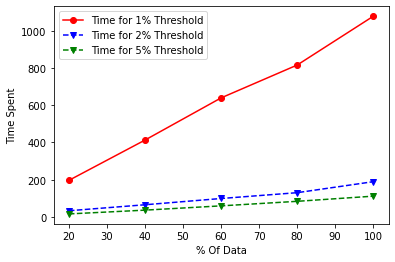

In [343]:
index=[20,40,60,80,100]
plt.plot(index,TP1T,'ro-',index,TP2T,'bv--',index,TP5T,'gv--')
plt.legend(['Time for 1% Threshold','Time for 2% Threshold',"Time for 5% Threshold"])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

# PCY vs Apriori Time Comparison For Retail

Text(0, 0.5, 'Time Spent')

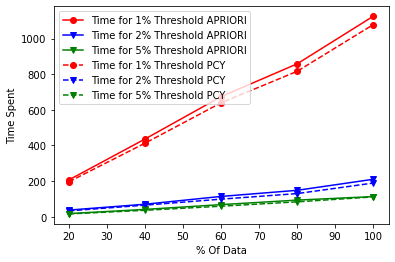

In [389]:
index=[20,40,60,80,100]
plt.plot(index,T1T,'ro-',index,T2T,'bv-',index,T5T,'gv-',index,TP1T,'ro--',index,TP2T,'bv--',index,TP5T,'gv--')
plt.legend(['Time for 1% Threshold APRIORI','Time for 2% Threshold APRIORI',"Time for 5% Threshold APRIORI",'Time for 1% Threshold PCY','Time for 2% Threshold PCY',"Time for 5% Threshold PCY"])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

# Apriori With Support Passed For SON and Random Sampling

In [40]:
def sup_Apriori(data,min_sup):# Pass the support threshold only
    
    #spliting datafram into 2D Array, Easier to implement
    numbers=split_2D_Array(data)
    
    
    dict_data = {'Buckets': numbers}
    df = pd.DataFrame.from_dict(dict_data)
    
    #Creating new dataframe
    items = []
    for i in range(len(df)):
        for j in range(len(df['Buckets'][i])):
            items.append(df['Buckets'][i][j])#all the values into an array
            
    #Implementing C1 for finding frequent Items
    C1DF=C1(items,df)
    
    
    #Implementing Pruning for C1 (L1)
    freqL1 = pruneNonFreqL1(data,C1DF,min_sup)
    
    #Implementing C2 for finding Frequent Itemsets
    C2DF=C2(freqL1,df) 
    
    #Implementing Pruning for C2 (L2)
    freqL2 = pruneNonFreqL1(data,C2DF,min_sup)
    
    return freqL2

# Implementation of Random Sampling

In [14]:
def random_Sampling_Apriori(data,min_sup):
    min_sup=data.shape[0]*min_sup 
    n_threshold=min_sup*0.25# new support
    data=data.sample(frac=0.25,random_state=1)
    ap=sup_Apriori(data,n_threshold)
    return ap

# Finding False Positives

In [15]:
def difference(Apri,data2):
    diff=0
    for x in data2['itemset']:
        if(x not in Apri["itemset"].values):
            diff+=1
    return diff

# Testing Random Sampling

In [41]:
print("Difference for 20% of the Data and 5% Threshold")

TRS5T=[]

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.20,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.05)
end_time=time.time()
TRS5T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)
    

Difference for 20% of the Data and 5% Threshold
Unique Pairs =  (10, 2)

Random Sampling Apriori
    itemset  Support
1  {32, 39}      411
3  {32, 48}      403
4  {38, 39}      477
6  {48, 38}      382
7  {41, 39}      559
8  {48, 39}     1478
9  {48, 41}      476 

Minimum support =  881.6
Unique Pairs =  (10, 2)

Apriori
    itemset  Support
1  {32, 39}     1658
3  {32, 48}     1554
4  {38, 39}     1992
6  {48, 38}     1558
7  {41, 39}     2256
8  {48, 39}     5768
9  {48, 41}     1795
Difference of false positives = 0


In [42]:
print("Difference for 40% of the Data and 5% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.05)
end_time=time.time()
TRS5T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)
    

Difference for 40% of the Data and 5% Threshold
Unique Pairs =  (10, 2)

Random Sampling Apriori
    itemset  Support
1  {32, 39}      830
3  {32, 48}      780
4  {38, 39}     1043
6  {48, 38}      837
7  {41, 39}     1148
8  {48, 39}     2919
9  {48, 41}      943 

Minimum support =  1763.2
Unique Pairs =  (10, 2)

Apriori
    itemset  Support
1  {32, 39}     3422
3  {32, 48}     3223
4  {38, 39}     4110
6  {48, 38}     3169
7  {41, 39}     4557
8  {48, 39}    11622
9  {48, 41}     3651
Difference of false positives = 0


In [43]:
print("Difference for 60% of the Data and 5% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.05)
end_time=time.time()
TRS5T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 60% of the Data and 5% Threshold
Unique Pairs =  (15, 2)

Random Sampling Apriori
     itemset  Support
2   {32, 39}     1219
4   {32, 48}     1147
9   {38, 39}     1579
11  {48, 38}     1177
12  {41, 39}     1713
13  {48, 39}     4297
14  {48, 41}     1376 

Minimum support =  2644.8500000000004
Unique Pairs =  (15, 2)

Apriori
     itemset  Support
2   {32, 39}     5113
4   {32, 48}     4823
9   {38, 39}     6153
11  {48, 38}     4748
12  {41, 39}     6828
13  {48, 39}    17416
14  {48, 41}     5454
Difference of false positives = 0


In [44]:
print("Difference for 80% of the Data and 5% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.05)
end_time=time.time()
TRS5T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 80% of the Data and 5% Threshold
Unique Pairs =  (10, 2)

Random Sampling Apriori
    itemset  Support
1  {32, 39}     1611
3  {32, 48}     1561
4  {38, 39}     2095
6  {48, 38}     1622
7  {41, 39}     2335
8  {48, 39}     5931
9  {48, 41}     1857 

Minimum support =  3526.4500000000003
Unique Pairs =  (15, 2)

Apriori
     itemset  Support
2   {32, 39}     6796
4   {32, 48}     6408
9   {38, 39}     8248
11  {48, 38}     6375
12  {41, 39}     9160
13  {48, 39}    23235
14  {48, 41}     7251
Difference of false positives = 0


In [45]:
print("Difference for 100% of the Data and 5% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.05)
end_time=time.time()
TRS5T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)
TRS5T

Difference for 100% of the Data and 5% Threshold
Unique Pairs =  (10, 2)

Random Sampling Apriori
    itemset  Support
1  {32, 39}     2049
3  {32, 48}     1998
4  {38, 39}     2581
6  {48, 38}     1980
7  {41, 39}     2922
8  {48, 39}     7303
9  {48, 41}     2304 

Minimum support =  4408.05
Unique Pairs =  (15, 2)

Apriori
     itemset  Support
2   {32, 39}     8455
4   {32, 48}     8034
9   {38, 39}    10345
11  {48, 38}     7944
12  {41, 39}    11414
13  {48, 39}    29142
14  {48, 41}     9018
Difference of false positives = 0


[2.924039363861084,
 6.717001438140869,
 11.163538932800293,
 15.08654260635376,
 20.573503255844116]

In [46]:
TRS5T

[2.924039363861084,
 6.717001438140869,
 11.163538932800293,
 15.08654260635376,
 20.573503255844116]

In [47]:
print("Difference for 20% of the Data and 2% Threshold")

TRS2T=[]

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.20,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.02)
end_time=time.time()
TRS2T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 20% of the Data and 2% Threshold
Unique Pairs =  (171, 2)

Random Sampling Apriori
       itemset  Support
36    {32, 38}      138
37    {32, 39}      411
38    {32, 41}      158
41    {32, 48}      403
51    {36, 38}      127
66    {38, 39}      477
67    {41, 38}      181
68   {170, 38}      133
70    {48, 38}      382
79   {110, 38}      130
80    {41, 39}      559
81   {170, 39}       90
83    {48, 39}     1478
84   {310, 39}       95
86    {65, 39}      122
87    {89, 39}      138
89   {225, 39}      123
91   {237, 39}      100
95    {48, 41}      476
126  {48, 310}       91
128   {48, 65}      128
129   {48, 89}      129 

Minimum support =  352.64
Unique Pairs =  (210, 2)

Apriori
       itemset  Support
58    {32, 38}      565
59    {32, 39}     1658
60    {32, 41}      637
63    {32, 48}     1554
74    {36, 38}      548
75    {36, 39}      410
90    {38, 39}     1992
91    {41, 38}      771
92   {170, 38}      582
94    {48, 38}     1558
104  {110, 38}      519


In [48]:
print("Difference for 40% of the Data and 2% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.02)
end_time=time.time()
TRS2T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 40% of the Data and 2% Threshold
Unique Pairs =  (153, 2)

Random Sampling Apriori
       itemset  Support
4     {32, 38}      287
5     {32, 39}      830
6     {32, 41}      330
11    {32, 48}      780
21   {225, 39}      236
36    {65, 39}      254
42    {48, 65}      247
49    {36, 38}      270
50    {36, 39}      192
75    {38, 39}     1043
76    {41, 38}      417
77   {170, 38}      325
79   {110, 38}      261
81    {48, 38}      837
87    {41, 39}     1148
88   {170, 39}      228
89   {237, 39}      199
92    {48, 39}     2919
94   {310, 39}      210
95    {89, 39}      266
102   {48, 41}      943
111  {48, 170}      177
139  {48, 310}      182
140   {48, 89}      260 

Minimum support =  705.28
Unique Pairs =  (171, 2)

Apriori
       itemset  Support
36    {32, 38}     1122
37    {32, 39}     3422
38    {32, 41}     1273
41    {32, 48}     3223
51    {36, 38}     1116
52    {36, 39}      815
66    {38, 39}     4110
67    {41, 38}     1556
68   {170, 38}     1192


In [49]:
print("Difference for 60% of the Data and 2% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.02)
end_time=time.time()
TRS2T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 60% of the Data and 2% Threshold
Unique Pairs =  (231, 2)

Random Sampling Apriori
       itemset  Support
79    {32, 38}      431
80    {32, 39}     1219
81    {32, 41}      473
84    {32, 48}     1147
95    {36, 38}      424
96    {36, 39}      310
111   {38, 39}     1579
112   {41, 38}      623
113  {170, 38}      481
115   {48, 38}     1177
125  {110, 38}      399
126   {41, 39}     1713
127  {170, 39}      326
129   {48, 39}     4297
131  {310, 39}      283
133   {65, 39}      428
134   {89, 39}      379
136  {225, 39}      363
138  {237, 39}      296
142   {48, 41}     1376
179   {48, 65}      396
180   {48, 89}      364 

Minimum support =  1057.94
Unique Pairs =  (171, 2)

Apriori
       itemset  Support
52    {32, 38}     1683
53    {32, 39}     5113
54    {32, 41}     1928
56    {32, 48}     4823
66    {36, 38}     1676
67    {36, 39}     1208
80    {38, 39}     6153
81    {41, 38}     2341
82   {170, 38}     1823
83    {48, 38}     4748
92   {110, 38}     1586

In [50]:
print("Difference for 80% of the Data and 2% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.02)
end_time=time.time()
TRS2T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 80% of the Data and 2% Threshold
Unique Pairs =  (171, 2)

Random Sampling Apriori
       itemset  Support
36    {32, 38}      522
37    {32, 39}     1611
38    {32, 41}      606
40    {32, 48}     1561
51    {36, 38}      594
52    {36, 39}      430
66    {38, 39}     2095
67    {41, 38}      815
68   {170, 38}      656
69    {48, 38}     1622
79   {110, 38}      557
80    {41, 39}     2335
81   {170, 39}      447
82    {48, 39}     5931
83   {310, 39}      366
86    {65, 39}      519
87    {89, 39}      544
89   {225, 39}      476
91   {237, 39}      380
92   {110, 39}      366
94    {48, 41}     1857
119   {48, 65}      488
120   {48, 89}      555
122  {48, 225}      363 

Minimum support =  1410.58
Unique Pairs =  (153, 2)

Apriori
       itemset  Support
4     {32, 38}     2276
5     {32, 39}     6796
6     {32, 41}     2560
11    {32, 48}     6408
21    {65, 39}     2199
27    {48, 65}     1996
36   {225, 39}     1875
49    {36, 38}     2242
50    {36, 39}     1627

In [51]:
print("Difference for 100% of the Data and 2% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.02)
end_time=time.time()
TRS2T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)
TRS2T

Difference for 100% of the Data and 2% Threshold
Unique Pairs =  (153, 2)

Random Sampling Apriori
       itemset  Support
4     {32, 38}      697
5     {32, 39}     2049
6     {32, 41}      833
11    {32, 48}     1998
21   {225, 39}      570
36    {65, 39}      700
42    {48, 65}      638
49    {36, 38}      701
50    {36, 39}      507
75    {38, 39}     2581
76    {41, 38}      978
77   {170, 38}      732
79   {110, 38}      712
81    {48, 38}     1980
87    {41, 39}     2922
88   {170, 39}      499
89   {237, 39}      497
90   {110, 39}      452
92    {48, 39}     7303
93   {310, 39}      469
95    {89, 39}      696
102   {48, 41}     2304
140   {48, 89}      730 

Minimum support =  1763.22
Unique Pairs =  (190, 2)

Apriori
       itemset  Support
55    {32, 38}     2833
56    {32, 39}     8455
57    {32, 41}     3196
60    {32, 48}     8034
70    {36, 38}     2790
71    {36, 39}     2037
85    {38, 39}    10345
86    {41, 38}     3897
87   {170, 38}     3031
89    {48, 38}     794

[6.232914924621582,
 12.959041833877563,
 24.07259774208069,
 28.618328332901,
 35.00030708312988]

In [52]:
print("Difference for 20% of the Data and 1% Threshold")

TRS1T=[]

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.20,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.01)
end_time=time.time()
TRS1T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 20% of the Data and 1% Threshold
Unique Pairs =  (2278, 2)

Random Sampling Apriori
        itemset  Support
95      {48, 9}       46
278   {270, 39}       50
340   {39, 271}       85
349   {48, 271}       60
520   {147, 39}       62
...         ...      ...
1598  {48, 225}       84
1600  {48, 101}       67
1603  {48, 237}       79
1604  {48, 110}       64
1611  {48, 255}       50

[62 rows x 2 columns] 

Minimum support =  176.32
Unique Pairs =  (2278, 2)

Apriori
          itemset  Support
215       {9, 39}      177
401     {270, 39}      256
409     {48, 270}      187
461     {39, 271}      280
469     {48, 271}      203
746     {147, 39}      212
754     {48, 147}      185
800     {533, 39}      187
808     {48, 533}      182
853     {413, 39}      222
861     {48, 413}      219
904     {38, 286}      214
955      {32, 38}      565
956      {32, 39}     1658
958      {32, 41}      637
964      {32, 48}     1554
1102     {36, 38}      548
1103     {36, 39}      410
11

In [53]:
print("Difference for 40% of the Data and 1% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.01)
end_time=time.time()
TRS1T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 40% of the Data and 1% Threshold
Unique Pairs =  (2485, 2)

Random Sampling Apriori
          itemset  Support
422     {270, 39}      109
430     {48, 270}       98
485     {39, 271}      146
493     {48, 271}      113
785     {147, 39}      103
793     {48, 147}      103
898     {533, 39}       95
1007    {413, 39}      102
1015    {48, 413}      104
1059    {38, 286}      102
1162     {32, 38}      287
1163     {32, 39}      830
1165     {32, 41}      330
1171     {32, 48}      780
1357     {38, 39}     1043
1358     {36, 38}      270
1359     {41, 38}      417
1360    {170, 38}      325
1361     {37, 38}      120
1365     {48, 38}      837
1394    {110, 38}      261
1404     {36, 39}      192
1405     {41, 39}     1148
1406    {170, 39}      228
1410   {1327, 39}      109
1411     {48, 39}     2919
1415    {438, 39}      123
1416    {310, 39}      210
1419     {60, 39}      104
1420   {2238, 39}      134
1421     {65, 39}      254
1426     {79, 39}      114
1430     {

In [54]:
print("Difference for 60% of the Data and 1% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.01)
end_time=time.time()
TRS1T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 60% of the Data and 1% Threshold
Unique Pairs =  (2346, 2)

Random Sampling Apriori
        itemset  Support
86      {9, 39}      135
344   {270, 39}      184
353   {48, 270}      150
467   {39, 271}      211
476   {48, 271}      167
...         ...      ...
1590  {48, 225}      259
1592  {48, 101}      181
1594  {48, 237}      244
1595  {48, 110}      205
1604  {48, 255}      144

[61 rows x 2 columns] 

Minimum support =  528.97
Unique Pairs =  (2415, 2)

Apriori
          itemset  Support
413     {270, 39}      719
422     {48, 270}      588
475     {39, 271}      840
484     {48, 271}      644
713     {147, 39}      672
722     {48, 147}      611
770     {533, 39}      537
826     {413, 39}      691
835     {48, 413}      692
880     {38, 286}      691
987      {32, 38}     1683
988      {32, 39}     5113
990      {32, 41}     1928
997      {32, 48}     4823
1140     {36, 38}     1676
1141     {36, 39}     1208
1150     {48, 36}      845
1190     {38, 39}     6153
11

In [55]:
print("Difference for 80% of the Data and 1% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.01)
end_time=time.time()
TRS1T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)

Difference for 80% of the Data and 1% Threshold
Unique Pairs =  (2346, 2)

Random Sampling Apriori
        itemset  Support
218     {9, 39}      190
407   {270, 39}      229
416   {48, 270}      180
528   {39, 271}      291
537   {48, 271}      206
...         ...      ...
1629  {48, 225}      363
1631  {48, 101}      277
1633  {48, 237}      331
1634  {48, 110}      306
1642  {48, 255}      187

[61 rows x 2 columns] 

Minimum support =  705.29
Unique Pairs =  (2278, 2)

Apriori
          itemset  Support
339     {270, 39}      953
347     {48, 270}      760
400     {39, 271}     1161
408     {48, 271}      865
634     {147, 39}      893
642     {48, 147}      810
690     {533, 39}      742
745     {413, 39}      909
753     {48, 413}      906
798     {38, 286}      912
903      {32, 38}     2276
904      {32, 39}     6796
906      {32, 41}     2560
912      {32, 48}     6408
1053     {36, 38}     2242
1054     {36, 39}     1627
1062     {48, 36}     1137
1102     {38, 39}     8248
11

In [56]:
print("Difference for 100% of the Data and 1% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')

start_time=time.time()
r_Sample=random_Sampling_Apriori(data,0.01)
end_time=time.time()
TRS1T.append(end_time-start_time)

print("\nRandom Sampling Apriori")
print(r_Sample,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,r_Sample)
print("Difference of false positives =",diff)
TRS1T

Difference for 100% of the Data and 1% Threshold
Unique Pairs =  (2556, 2)

Random Sampling Apriori
         itemset  Support
229      {9, 39}      223
491    {270, 39}      307
499    {48, 270}      238
554    {39, 271}      361
562    {48, 271}      285
...          ...      ...
1760   {48, 101}      305
1763   {48, 237}      405
1764   {48, 110}      354
1771  {48, 1146}      225
1775   {48, 255}      255

[62 rows x 2 columns] 

Minimum support =  881.61
Unique Pairs =  (2415, 2)

Apriori
          itemset  Support
351     {270, 39}     1194
359     {48, 270}      957
414     {39, 271}     1434
422     {48, 271}     1090
656     {147, 39}     1137
664     {48, 147}     1036
771     {533, 39}      922
882     {413, 39}     1130
890     {48, 413}     1135
935     {38, 286}     1116
1040     {32, 38}     2833
1041     {32, 39}     8455
1043     {32, 41}     3196
1049     {32, 48}     8034
1141     {36, 38}     2790
1142     {36, 39}     2037
1150     {48, 36}     1416
1190     {37, 38

[43.263190269470215,
 92.47676706314087,
 132.41246461868286,
 192.37953281402588,
 244.6000783443451]

# Comparing Time Taken

Text(0, 0.5, 'Time Spent')

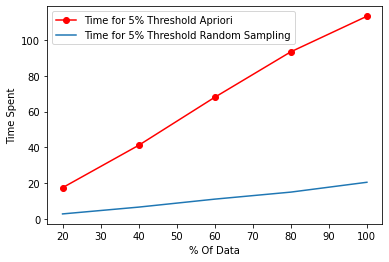

In [57]:
index=[20,40,60,80,100]
T5T=[17.546502828598022,
 41.169007301330566,
 67.96401166915894,
 93.32701563835144,
 113.1610198020935]#Taken from Apriori Test
plt.plot(index,T5T,'ro-',index,TRS5T)
plt.legend(['Time for 5% Threshold Apriori','Time for 5% Threshold Random Sampling'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

Text(0, 0.5, 'Time Spent')

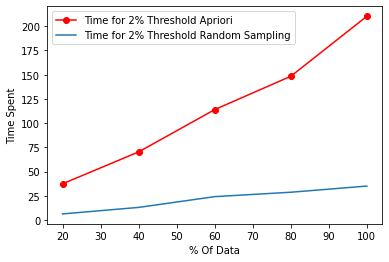

In [58]:
index=[20,40,60,80,100]
T2T=[37.32550597190857,
 70.25151181221008,
 113.96851944923401,
 148.3745255470276,
 210.3475363254547]#Taken from Apriori Test
plt.plot(index,T2T,'ro-',index,TRS2T)
plt.legend(['Time for 2% Threshold Apriori','Time for 2% Threshold Random Sampling'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

Text(0, 0.5, 'Time Spent')

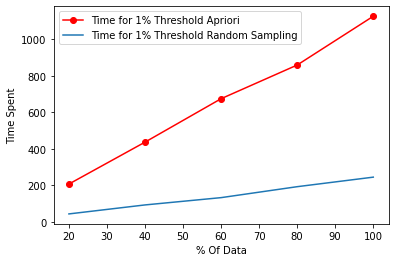

In [59]:
index=[20,40,60,80,100]
T1T=[206.8355348110199,
 436.2755742073059,
 674.1361153125763,
 858.5256469249725,
 1125.6156921386719]#Taken from Apriori Test
plt.plot(index,T1T,'ro-',index,TRS1T)
plt.legend(['Time for 1% Threshold Apriori','Time for 1% Threshold Random Sampling'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

# SON Algorithmn Implemented With Apriori

In [60]:
def son_algo(data,min_sup):
    df_split = np.array_split(data, 5)
    min_sup=data.shape[0]*min_sup
    print("Minimum Support for Each Chunk = ",min_sup)
    df0=sup_Apriori(df_split[0],min_sup)
    df1=sup_Apriori(df_split[1],min_sup)
    df2=sup_Apriori(df_split[2],min_sup)
    df3=sup_Apriori(df_split[3],min_sup)
    df4=sup_Apriori(df_split[4],min_sup)
    
    print("\nChunk 1 \n")
    print(df0)
    
    print("\nChunk 2 \n")
    print(df1)
    
    print("\nChunk 3 \n")
    print(df2)
    
    print("\nChunk 4 \n")
    print(df3)
    
    print("\nChunk 5 \n")
    print(df4)
    
    dataframe=[df0,df1,df2,df3,df4]    
    result = pd.concat(dataframe)  
    return result
    

# Finding False Negatives

In [61]:
def differenceNegatives(Apri,data2):
    diff=0
    for x in Apri['itemset']:
        if(x not in data2["itemset"].values):
            diff+=1
    return diff

# Testing SON

In [62]:
print("Difference for 20% of the Data and 5% Threshold")

TS5T=[]

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.20,random_state=10)
start_time=time.time()
son_Ap=son_algo(data,0.05)
end_time=time.time()
TS5T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 20% of the Data and 5% Threshold
Minimum Support for Each Chunk =  881.6
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)

Chunk 1 

    itemset  Support
0  {48, 39}     1183

Chunk 2 

    itemset  Support
0  {48, 39}     1145

Chunk 3 

    itemset  Support
0  {48, 39}     1112

Chunk 4 

    itemset  Support
0  {48, 39}     1165

Chunk 5 

    itemset  Support
0  {48, 39}     1163

Son Apriori
    itemset  Support
0  {48, 39}     1183
0  {48, 39}     1145
0  {48, 39}     1112
0  {48, 39}     1165
0  {48, 39}     1163 

Minimum support =  881.6
Unique Pairs =  (10, 2)

Apriori
    itemset  Support
1  {32, 39}     1658
3  {32, 48}     1554
4  {38, 39}     1992
6  {48, 38}     1558
7  {41, 39}     2256
8  {48, 39}     5768
9  {48, 41}     1795
Difference of false positives = 0
Difference of false negatives = 6


In [63]:
print("Difference for 40% of the Data and 5% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.05)
end_time=time.time()
TS5T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 40% of the Data and 5% Threshold
Minimum Support for Each Chunk =  1763.2
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)

Chunk 1 

    itemset  Support
0  {48, 39}     2328

Chunk 2 

    itemset  Support
0  {48, 39}     2277

Chunk 3 

    itemset  Support
0  {48, 39}     2327

Chunk 4 

    itemset  Support
0  {48, 39}     2373

Chunk 5 

    itemset  Support
0  {48, 39}     2317

Son Apriori
    itemset  Support
0  {48, 39}     2328
0  {48, 39}     2277
0  {48, 39}     2327
0  {48, 39}     2373
0  {48, 39}     2317 

Minimum support =  1763.2
Unique Pairs =  (10, 2)

Apriori
    itemset  Support
1  {32, 39}     3422
3  {32, 48}     3223
4  {38, 39}     4110
6  {48, 38}     3169
7  {41, 39}     4557
8  {48, 39}    11622
9  {48, 41}     3651
Difference of false positives = 0
Difference of false negatives = 6


In [64]:
print("Difference for 60% of the Data and 5% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.05)
end_time=time.time()
TS5T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 60% of the Data and 5% Threshold
Minimum Support for Each Chunk =  2644.8500000000004
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)

Chunk 1 

    itemset  Support
0  {48, 39}     3440

Chunk 2 

    itemset  Support
0  {48, 39}     3492

Chunk 3 

    itemset  Support
0  {48, 39}     3541

Chunk 4 

    itemset  Support
0  {48, 39}     3448

Chunk 5 

    itemset  Support
0  {48, 39}     3495

Son Apriori
    itemset  Support
0  {48, 39}     3440
0  {48, 39}     3492
0  {48, 39}     3541
0  {48, 39}     3448
0  {48, 39}     3495 

Minimum support =  2644.8500000000004
Unique Pairs =  (15, 2)

Apriori
     itemset  Support
2   {32, 39}     5113
4   {32, 48}     4823
9   {38, 39}     6153
11  {48, 38}     4748
12  {41, 39}     6828
13  {48, 39}    17416
14  {48, 41}     5454
Difference of false positives = 0
Difference of false negatives = 6


In [65]:
print("Difference for 80% of the Data and 5% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.05)
end_time=time.time()
TS5T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 80% of the Data and 5% Threshold
Minimum Support for Each Chunk =  3526.4500000000003
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)

Chunk 1 

    itemset  Support
0  {48, 39}     4605

Chunk 2 

    itemset  Support
0  {48, 39}     4700

Chunk 3 

    itemset  Support
0  {48, 39}     4616

Chunk 4 

    itemset  Support
0  {48, 39}     4619

Chunk 5 

    itemset  Support
0  {48, 39}     4695

Son Apriori
    itemset  Support
0  {48, 39}     4605
0  {48, 39}     4700
0  {48, 39}     4616
0  {48, 39}     4619
0  {48, 39}     4695 

Minimum support =  3526.4500000000003
Unique Pairs =  (15, 2)

Apriori
     itemset  Support
2   {32, 39}     6796
4   {32, 48}     6408
9   {38, 39}     8248
11  {48, 38}     6375
12  {41, 39}     9160
13  {48, 39}    23235
14  {48, 41}     7251
Difference of false positives = 0
Difference of false negatives = 6


In [66]:
print("Difference for 100% of the Data and 5% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')

start_time=time.time()
son_Ap=son_algo(data,0.05)
end_time=time.time()
TS5T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.05)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)
TS5T

Difference for 100% of the Data and 5% Threshold
Minimum Support for Each Chunk =  4408.05
Unique Pairs =  (3, 2)
Unique Pairs =  (3, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)
Unique Pairs =  (1, 2)

Chunk 1 

    itemset  Support
1  {48, 39}     5308

Chunk 2 

    itemset  Support
1  {48, 39}     6089

Chunk 3 

    itemset  Support
0  {48, 39}     5746

Chunk 4 

    itemset  Support
0  {48, 39}     5882

Chunk 5 

    itemset  Support
0  {48, 39}     6117

Son Apriori
    itemset  Support
1  {48, 39}     5308
1  {48, 39}     6089
0  {48, 39}     5746
0  {48, 39}     5882
0  {48, 39}     6117 

Minimum support =  4408.05
Unique Pairs =  (15, 2)

Apriori
     itemset  Support
2   {32, 39}     8455
4   {32, 48}     8034
9   {38, 39}    10345
11  {48, 38}     7944
12  {41, 39}    11414
13  {48, 39}    29142
14  {48, 41}     9018
Difference of false positives = 0
Difference of false negatives = 6


[8.723626852035522,
 21.156503438949585,
 35.37100577354431,
 51.031259059906006,
 57.476906061172485]

In [67]:
print("Difference for 20% of the Data and 2% Threshold")

TS2T=[]

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.20,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.02)
end_time=time.time()
TS2T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 20% of the Data and 2% Threshold
Minimum Support for Each Chunk =  352.64
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)

Chunk 1 

    itemset  Support
4  {38, 39}      378
7  {41, 39}      479
8  {48, 39}     1183
9  {48, 41}      372

Chunk 2 

    itemset  Support
4  {38, 39}      407
7  {41, 39}      446
8  {48, 39}     1145
9  {48, 41}      365

Chunk 3 

    itemset  Support
4  {38, 39}      403
7  {41, 39}      429
8  {48, 39}     1112

Chunk 4 

    itemset  Support
4  {38, 39}      418
7  {41, 39}      467
8  {48, 39}     1165
9  {48, 41}      367

Chunk 5 

    itemset  Support
4  {38, 39}      386
7  {41, 39}      435
8  {48, 39}     1163

Son Apriori
    itemset  Support
4  {38, 39}      378
7  {41, 39}      479
8  {48, 39}     1183
9  {48, 41}      372
4  {38, 39}      407
7  {41, 39}      446
8  {48, 39}     1145
9  {48, 41}      365
4  {38, 39}      403
7  {41, 39}      429
8  {48, 3

In [68]:
print("Difference for 40% of the Data and 2% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.02)
end_time=time.time()
TS2T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 40% of the Data and 2% Threshold
Minimum Support for Each Chunk =  705.28
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)

Chunk 1 

    itemset  Support
4  {38, 39}      785
7  {41, 39}      925
8  {48, 39}     2328
9  {48, 41}      736

Chunk 2 

    itemset  Support
4  {38, 39}      821
7  {41, 39}      896
8  {48, 39}     2277
9  {48, 41}      718

Chunk 3 

    itemset  Support
4  {38, 39}      835
7  {41, 39}      878
8  {48, 39}     2327

Chunk 4 

    itemset  Support
4  {38, 39}      851
7  {41, 39}      931
8  {48, 39}     2373
9  {48, 41}      773

Chunk 5 

    itemset  Support
1  {32, 39}      722
4  {38, 39}      818
7  {41, 39}      927
8  {48, 39}     2317
9  {48, 41}      748

Son Apriori
    itemset  Support
4  {38, 39}      785
7  {41, 39}      925
8  {48, 39}     2328
9  {48, 41}      736
4  {38, 39}      821
7  {41, 39}      896
8  {48, 39}     2277
9  {48, 41}      718
4  {38, 3

In [69]:
print("Difference for 60% of the Data and 2% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.02)
end_time=time.time()
TS2T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 60% of the Data and 2% Threshold
Minimum Support for Each Chunk =  1057.94
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)

Chunk 1 

    itemset  Support
4  {38, 39}     1188
7  {41, 39}     1354
8  {48, 39}     3440
9  {48, 41}     1087

Chunk 2 

    itemset  Support
4  {38, 39}     1253
7  {41, 39}     1345
8  {48, 39}     3492

Chunk 3 

    itemset  Support
1  {32, 39}     1062
4  {38, 39}     1273
7  {41, 39}     1392
8  {48, 39}     3541
9  {48, 41}     1135

Chunk 4 

    itemset  Support
4  {38, 39}     1190
7  {41, 39}     1354
8  {48, 39}     3448
9  {48, 41}     1089

Chunk 5 

    itemset  Support
4  {38, 39}     1249
7  {41, 39}     1383
8  {48, 39}     3495
9  {48, 41}     1100

Son Apriori
    itemset  Support
4  {38, 39}     1188
7  {41, 39}     1354
8  {48, 39}     3440
9  {48, 41}     1087
4  {38, 39}     1253
7  {41, 39}     1345
8  {48, 39}     3492
1  {32, 39}     1062
4  {38, 

In [70]:
print("Difference for 80% of the Data and 2% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.02)
end_time=time.time()
TS2T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 80% of the Data and 2% Threshold
Minimum Support for Each Chunk =  1410.58
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)

Chunk 1 

    itemset  Support
4  {38, 39}     1606
7  {41, 39}     1821
8  {48, 39}     4605
9  {48, 41}     1454

Chunk 2 

    itemset  Support
4  {38, 39}     1686
7  {41, 39}     1809
8  {48, 39}     4700
9  {48, 41}     1449

Chunk 3 

    itemset  Support
4  {38, 39}     1612
7  {41, 39}     1815
8  {48, 39}     4616
9  {48, 41}     1451

Chunk 4 

    itemset  Support
4  {38, 39}     1665
7  {41, 39}     1846
8  {48, 39}     4619
9  {48, 41}     1445

Chunk 5 

    itemset  Support
4  {38, 39}     1679
7  {41, 39}     1869
8  {48, 39}     4695
9  {48, 41}     1452

Son Apriori
    itemset  Support
4  {38, 39}     1606
7  {41, 39}     1821
8  {48, 39}     4605
9  {48, 41}     1454
4  {38, 39}     1686
7  {41, 39}     1809
8  {48, 39}     4700
9  {48, 41}     1449
4  {38, 

In [71]:
print("Difference for 100% of the Data and 2% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')

start_time=time.time()
son_Ap=son_algo(data,0.02)
end_time=time.time()
TS2T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.02)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 100% of the Data and 2% Threshold
Minimum Support for Each Chunk =  1763.22
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (6, 2)
Unique Pairs =  (6, 2)
Unique Pairs =  (10, 2)

Chunk 1 

    itemset  Support
4  {38, 39}     1977
7  {41, 39}     3574
8  {48, 39}     5308
9  {48, 41}     2701

Chunk 2 

    itemset  Support
4  {38, 39}     2077
7  {41, 39}     3854
8  {48, 39}     6089
9  {48, 41}     3097

Chunk 3 

    itemset  Support
2  {48, 39}     5746
5  {38, 39}     2120

Chunk 4 

    itemset  Support
2  {48, 39}     5882
5  {38, 39}     2154

Chunk 5 

    itemset  Support
4  {38, 39}     2017
7  {41, 39}     3356
8  {48, 39}     6117
9  {48, 41}     2718

Son Apriori
    itemset  Support
4  {38, 39}     1977
7  {41, 39}     3574
8  {48, 39}     5308
9  {48, 41}     2701
4  {38, 39}     2077
7  {41, 39}     3854
8  {48, 39}     6089
9  {48, 41}     3097
2  {48, 39}     5746
5  {38, 39}     2120
2  {48, 39}     5882
5  {38, 39}     2154
4  {38, 3

In [72]:
print("Difference for 20% of the Data and 1% Threshold")

TS1T=[]

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.20,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.01)
end_time=time.time()
TS1T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 20% of the Data and 1% Threshold
Minimum Support for Each Chunk =  176.32
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (15, 2)

Chunk 1 

    itemset  Support
1  {32, 39}      344
3  {32, 48}      325
4  {38, 39}      378
6  {48, 38}      311
7  {41, 39}      479
8  {48, 39}     1183
9  {48, 41}      372

Chunk 2 

    itemset  Support
1  {32, 39}      318
3  {32, 48}      301
4  {38, 39}      407
6  {48, 38}      303
7  {41, 39}      446
8  {48, 39}     1145
9  {48, 41}      365

Chunk 3 

    itemset  Support
1  {32, 39}      327
3  {32, 48}      310
4  {38, 39}      403
6  {48, 38}      308
7  {41, 39}      429
8  {48, 39}     1112
9  {48, 41}      350

Chunk 4 

    itemset  Support
1  {32, 39}      336
3  {32, 48}      293
4  {38, 39}      418
6  {48, 38}      317
7  {41, 39}      467
8  {48, 39}     1165
9  {48, 41}      367

Chunk 5 

     itemset  Support
2   {32, 39}      333
4   {32, 48}      32

In [73]:
print("Difference for 40% of the Data and 1% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.40,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.01)
end_time=time.time()
TS1T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 40% of the Data and 1% Threshold
Minimum Support for Each Chunk =  352.64
Unique Pairs =  (10, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (15, 2)
Unique Pairs =  (15, 2)
Unique Pairs =  (10, 2)

Chunk 1 

    itemset  Support
1  {32, 39}      662
3  {32, 48}      626
4  {38, 39}      785
6  {48, 38}      614
7  {41, 39}      925
8  {48, 39}     2328
9  {48, 41}      736

Chunk 2 

    itemset  Support
1  {32, 39}      663
3  {32, 48}      603
4  {38, 39}      821
6  {48, 38}      625
7  {41, 39}      896
8  {48, 39}     2277
9  {48, 41}      718

Chunk 3 

     itemset  Support
2   {32, 39}      697
4   {32, 48}      677
9   {38, 39}      835
11  {48, 38}      642
12  {41, 39}      878
13  {48, 39}     2327
14  {48, 41}      676

Chunk 4 

     itemset  Support
2   {32, 39}      678
4   {32, 48}      656
9   {38, 39}      851
11  {48, 38}      679
12  {41, 39}      931
13  {48, 39}     2373
14  {48, 41}      773

Chunk 5 

    itemset  Support
1  {32, 39}      722
3  {32

In [74]:
print("Difference for 60% of the Data and 1% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.60,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.01)
end_time=time.time()
TS1T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 60% of the Data and 1% Threshold
Minimum Support for Each Chunk =  528.97
Unique Pairs =  (10, 2)
Unique Pairs =  (15, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (15, 2)
Unique Pairs =  (15, 2)

Chunk 1 

    itemset  Support
1  {32, 39}      989
3  {32, 48}      936
4  {38, 39}     1188
6  {48, 38}      922
7  {41, 39}     1354
8  {48, 39}     3440
9  {48, 41}     1087

Chunk 2 

     itemset  Support
2   {32, 39}     1033
4   {32, 48}      970
9   {38, 39}     1253
11  {48, 38}      959
12  {41, 39}     1345
13  {48, 39}     3492
14  {48, 41}     1043

Chunk 3 

    itemset  Support
1  {32, 39}     1062
3  {32, 48}      996
4  {38, 39}     1273
6  {48, 38}      977
7  {41, 39}     1392
8  {48, 39}     3541
9  {48, 41}     1135

Chunk 4 

     itemset  Support
2   {32, 39}     1003
4   {32, 48}      964
9   {38, 39}     1190
11  {48, 38}      910
12  {41, 39}     1354
13  {48, 39}     3448
14  {48, 41}     1089

Chunk 5 

     itemset  Support
2   {32, 39}     1026
4   

In [75]:
print("Difference for 80% of the Data and 1% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')
data=data.sample(frac=0.80,random_state=10)

start_time=time.time()
son_Ap=son_algo(data,0.01)
end_time=time.time()
TS1T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 80% of the Data and 1% Threshold
Minimum Support for Each Chunk =  705.29
Unique Pairs =  (10, 2)
Unique Pairs =  (15, 2)
Unique Pairs =  (15, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (15, 2)

Chunk 1 

    itemset  Support
1  {32, 39}     1325
3  {32, 48}     1229
4  {38, 39}     1606
6  {48, 38}     1239
7  {41, 39}     1821
8  {48, 39}     4605
9  {48, 41}     1454

Chunk 2 

     itemset  Support
2   {32, 39}     1375
4   {32, 48}     1333
9   {38, 39}     1686
11  {48, 38}     1321
12  {41, 39}     1809
13  {48, 39}     4700
14  {48, 41}     1449

Chunk 3 

     itemset  Support
2   {32, 39}     1387
4   {32, 48}     1304
9   {38, 39}     1612
11  {48, 38}     1208
12  {41, 39}     1815
13  {48, 39}     4616
14  {48, 41}     1451

Chunk 4 

    itemset  Support
1  {32, 39}     1379
3  {32, 48}     1286
4  {38, 39}     1665
6  {48, 38}     1285
7  {41, 39}     1846
8  {48, 39}     4619
9  {48, 41}     1445

Chunk 5 

     itemset  Support
2   {32, 39}     1330
4   

In [76]:
print("Difference for 100% of the Data and 1% Threshold")

data=pd.read_csv(r'C:\Users\Talha\Desktop\retail.csv')

start_time=time.time()
son_Ap=son_algo(data,0.01)
end_time=time.time()
TS1T.append(end_time-start_time)

print("\nSon Apriori")
print(son_Ap,"\n")

Apri=Apriori(data,0.01)
print("\nApriori")
print(Apri)

diff=difference(Apri,son_Ap)
print("Difference of false positives =",diff)
diff2=differenceNegatives(Apri,son_Ap)
print("Difference of false negatives =",diff2)

Difference for 100% of the Data and 1% Threshold
Minimum Support for Each Chunk =  881.61
Unique Pairs =  (10, 2)
Unique Pairs =  (15, 2)
Unique Pairs =  (15, 2)
Unique Pairs =  (10, 2)
Unique Pairs =  (36, 2)

Chunk 1 

    itemset  Support
1  {32, 39}     1744
2  {32, 41}     1072
3  {32, 48}     1633
4  {38, 39}     1977
5  {41, 38}     1240
6  {48, 38}     1413
7  {41, 39}     3574
8  {48, 39}     5308
9  {48, 41}     2701

Chunk 2 

     itemset  Support
2   {32, 39}     1756
3   {32, 41}     1055
4   {32, 48}     1691
9   {38, 39}     2077
10  {41, 38}     1313
11  {48, 38}     1697
12  {41, 39}     3854
13  {48, 39}     6089
14  {48, 41}     3097

Chunk 3 

     itemset  Support
2   {32, 39}     1608
3   {32, 48}     1488
9   {38, 39}     2120
10  {48, 38}     1601
12  {48, 39}     5746

Chunk 4 

    itemset  Support
2  {32, 39}     1691
3  {32, 48}     1566
7  {38, 39}     2154
8  {48, 38}     1656
9  {48, 39}     5882

Chunk 5 

     itemset  Support
1   {32, 39}     1656
2  

# Comparing SON to Apriori and Random Sampling

Text(0, 0.5, 'Time Spent')

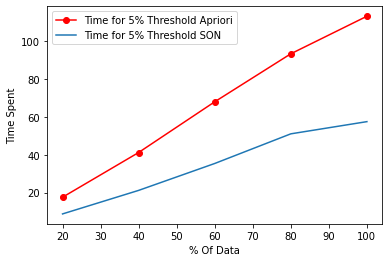

In [77]:
index=[20,40,60,80,100]
T5T=[17.546502828598022,
 41.169007301330566,
 67.96401166915894,
 93.32701563835144,
 113.1610198020935]#Taken from Apriori Test For 5% Threshold
plt.plot(index,T5T,'ro-',index,TS5T)
plt.legend(['Time for 5% Threshold Apriori','Time for 5% Threshold SON'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

Text(0, 0.5, 'Time Spent')

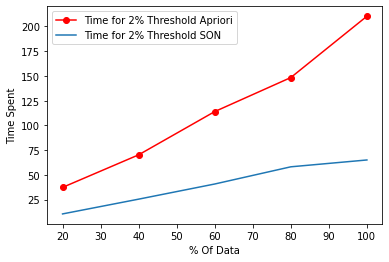

In [78]:
index=[20,40,60,80,100]
T2T=[37.32550597190857,
 70.25151181221008,
 113.96851944923401,
 148.3745255470276,
 210.3475363254547]#Taken from Apriori Test
plt.plot(index,T2T,'ro-',index,TS2T)
plt.legend(['Time for 2% Threshold Apriori','Time for 2% Threshold SON'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

Text(0, 0.5, 'Time Spent')

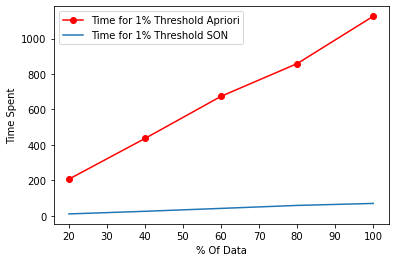

In [79]:
index=[20,40,60,80,100]
T1T=[206.8355348110199,
 436.2755742073059,
 674.1361153125763,
 858.5256469249725,
 1125.6156921386719]#Taken from Apriori Test
plt.plot(index,T1T,'ro-',index,TS1T)
plt.legend(['Time for 1% Threshold Apriori','Time for 1% Threshold SON'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

# Comparing SON vs Random Sampling

Text(0, 0.5, 'Time Spent')

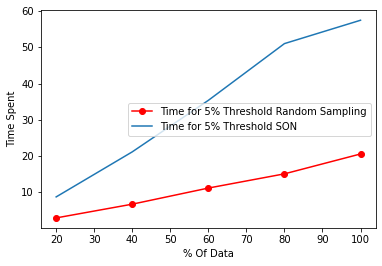

In [80]:
index=[20,40,60,80,100]
plt.plot(index,TRS5T,'ro-',index,TS5T)
plt.legend(['Time for 5% Threshold Random Sampling','Time for 5% Threshold SON'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

Text(0, 0.5, 'Time Spent')

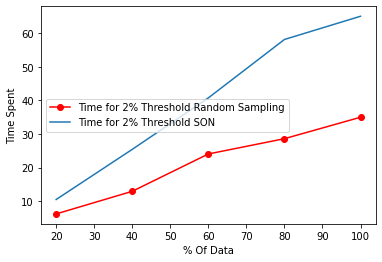

In [81]:
index=[20,40,60,80,100]
plt.plot(index,TRS2T,'ro-',index,TS2T)
plt.legend(['Time for 2% Threshold Random Sampling','Time for 2% Threshold SON'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')

Text(0, 0.5, 'Time Spent')

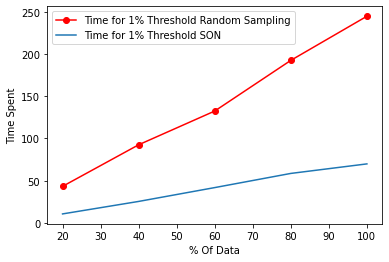

In [82]:
index=[20,40,60,80,100]
plt.plot(index,TRS1T,'ro-',index,TS1T)
plt.legend(['Time for 1% Threshold Random Sampling','Time for 1% Threshold SON'])
plt.xlabel('% Of Data')
plt.ylabel('Time Spent')